# Final Project - Data in Hand
### Kaitlin Cochran

For my final project, I wish to explore if variables created by Spotify for a track (i.e. danceability, key, etc.) have an impact on how popular the track is. To do this, I pulled songs from the Top Songs USA playlist on Spotify. I may have to pull in other playlists to make the data more reliable, but I decided to start small. I also will need to pick a song to compare to this data that is relatively new, which I will do at the time of the Analysis Plan or Preliminary Draft stage so that I get the most accurate data. I will also probably rerun the code below to get more accurate songs on the Top Songs USA playlist. Below is the code I used to query the Tracks API and Playlist API from Spotify.

Import statements for the libraries I will be using.

In [1]:
import pandas as pd
import requests
import base64
import json
from matplotlib import pyplot as plt

Reading in my tokens for a new application on the Spotify developer website.

In [2]:
tokens = pd.read_csv('keys.txt', sep = '\t', header = None).T
tokens.columns = tokens.iloc[0]

Formatting the tokens file so it can be read by functions later on.

In [3]:
tokens = tokens[1:]

A function we made together in class which creates a session header to use to connect to the client.

In [4]:
def start_session_headers(client_id, client_secret):
    client_cred = base64.b64encode(str(client_id + ":" + client_secret).encode('ascii'))
    header = {'Authorization': 'Basic %s' % (client_cred.decode('ascii'))}
    return header

A function we made together in class which connects to the client using the URL and header.

In [5]:
def connect_to_client_cred(url, header):
        payload = {'grant_type' : 'client_credentials'}
        response = requests.request("POST", url, headers = header, data = payload )
        print(response.status_code)
        if response.status_code != 200:
            raise Exception(response.status_code, response.text)
        return response.json()

A function we made together in class which gets an access token using both of the above methods in order to query specific Spotify APIs.

In [6]:
def get_access_token(client_id, client_secret):
    url = "https://accounts.spotify.com/api/token"
    header = start_session_headers(client_id, client_secret)
    json_response = connect_to_client_cred(url, header)
    return json_response

Acquiring the session token.

In [7]:
session_token = get_access_token(tokens['clientID'].iloc[0], tokens['clientSecret'].iloc[0])

200


A function we made in class that creates a header to query Spotify APIs.

In [8]:
def create_header(session_token):
    headers = {"Authorization": "Bearer {}".format(session_token)}
    return headers

A function we made in class that connects to a specific Spotify endpoint to gather specific data through a GET request.

In [9]:
def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers = headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

A function I created to gather information about a Spotify playlist through the playlist id, found on Spotify.

In [10]:
def get_a_playlist(playlist_id):
    url = 'https://api.spotify.com/v1/playlists/{}/tracks'.format(playlist_id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

A function we created in class to get information about a track on Spotify through the track id, found on Spotify.

In [11]:
def get_a_track(track_id):
    url = 'https://api.spotify.com/v1/tracks/{}'.format(track_id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

A function we created in class to get Spotify-created variables about tracks through the track id, found on Spotify.

In [12]:
def track_audio_features(track_id, offset):
    url = 'https://api.spotify.com/v1/audio-features/{}?offset={}'.format((track_id), format(offset))
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

Querying the Playlist API using the playlist id for the Top Songs USA playlist.

In [13]:
playlist = get_a_playlist('37i9dQZEVXbLp5XoPON0wI')

200


Looking at the keys from the response to make a decision on what to use to make a helpful Data Frame.

In [14]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

Getting the first item in the response.

In [ ]:
playlist['items'][0]

Getting the track id for the first item in the response.

In [16]:
playlist['items'][0]['track']['id']

'46IZ0fSY2mpAiktS3KOqds'

Getting the track name for the first item in the response.

In [17]:
playlist['items'][0]['track']['name']

'Easy On Me'

Getting all track ids from the response.

In [18]:
tracks = [x['track']['id'] for x in playlist['items']]

Getting all track names from the response.

In [19]:
trackNames = [x['track']['name'] for x in playlist['items']]

Getting audio feature information for all songs in the Top Songs USA playlist.

In [ ]:
trackInfo = [track_audio_features(x, 50) for x in tracks]

Creating a Data Frame from the response from the Audio Features API.

In [21]:
tracksDf = pd.DataFrame(trackInfo)

The data frame from the Audio Features API.

In [22]:
tracksDf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.604,0.366,5,-7.519,1,0.0282,0.5780,0.000000,0.1330,0.130,141.981,audio_features,46IZ0fSY2mpAiktS3KOqds,spotify:track:46IZ0fSY2mpAiktS3KOqds,https://api.spotify.com/v1/tracks/46IZ0fSY2mpA...,https://api.spotify.com/v1/audio-analysis/46IZ...,224695,4
1,0.631,0.518,0,-8.771,1,0.0303,0.2740,0.000000,0.0880,0.205,93.023,audio_features,5enxwA8aAbwZbf5qCHORXi,spotify:track:5enxwA8aAbwZbf5qCHORXi,https://api.spotify.com/v1/tracks/5enxwA8aAbwZ...,https://api.spotify.com/v1/audio-analysis/5enx...,613027,4
2,0.741,0.691,10,-7.395,0,0.0672,0.0221,0.000000,0.0476,0.892,150.087,audio_features,5Z9KJZvQzH6PFmb8SNkxuk,spotify:track:5Z9KJZvQzH6PFmb8SNkxuk,https://api.spotify.com/v1/tracks/5Z9KJZvQzH6P...,https://api.spotify.com/v1/audio-analysis/5Z9K...,212353,4
3,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,audio_features,5PjdY0CKGZdEuoNab3yDmX,spotify:track:5PjdY0CKGZdEuoNab3yDmX,https://api.spotify.com/v1/tracks/5PjdY0CKGZdE...,https://api.spotify.com/v1/audio-analysis/5Pjd...,141806,4
4,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,02MWAaffLxlfxAUY7c5dvx,spotify:track:02MWAaffLxlfxAUY7c5dvx,https://api.spotify.com/v1/tracks/02MWAaffLxlf...,https://api.spotify.com/v1/audio-analysis/02MW...,238805,4


Creating a Data Frame using the track ids and names obtained earlier.

In [23]:
trackNamesDf = pd.DataFrame({'id': tracks, 'name': trackNames})

The resulting Data Frame.

In [24]:
trackNamesDf.head()

,id,name
0,46IZ0fSY2mpAiktS3KOqds,Easy On Me
1,5enxwA8aAbwZbf5qCHORXi,All Too Well (10 Minute Version) (Taylor's Ver...
2,5Z9KJZvQzH6PFmb8SNkxuk,INDUSTRY BABY (feat. Jack Harlow)
3,5PjdY0CKGZdEuoNab3yDmX,STAY (with Justin Bieber)
4,02MWAaffLxlfxAUY7c5dvx,Heat Waves


Creating the final data frame for this playlist, which combines the above Data Frame of ids and names with the original Data Frame containing audio track information.

In [25]:
finalDf = pd.merge(tracksDf, trackNamesDf, left_on = "id", right_on = 'id', how = 'left')

The resulting Data Frame.

In [26]:
finalDf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name
0,0.604,0.366,5,-7.519,1,0.0282,0.5780,0.000000,0.1330,0.130,141.981,audio_features,46IZ0fSY2mpAiktS3KOqds,spotify:track:46IZ0fSY2mpAiktS3KOqds,https://api.spotify.com/v1/tracks/46IZ0fSY2mpA...,https://api.spotify.com/v1/audio-analysis/46IZ...,224695,4,Easy On Me
1,0.631,0.518,0,-8.771,1,0.0303,0.2740,0.000000,0.0880,0.205,93.023,audio_features,5enxwA8aAbwZbf5qCHORXi,spotify:track:5enxwA8aAbwZbf5qCHORXi,https://api.spotify.com/v1/tracks/5enxwA8aAbwZ...,https://api.spotify.com/v1/audio-analysis/5enx...,613027,4,All Too Well (10 Minute Version) (Taylor's Ver...
2,0.741,0.691,10,-7.395,0,0.0672,0.0221,0.000000,0.0476,0.892,150.087,audio_features,5Z9KJZvQzH6PFmb8SNkxuk,spotify:track:5Z9KJZvQzH6PFmb8SNkxuk,https://api.spotify.com/v1/tracks/5Z9KJZvQzH6P...,https://api.spotify.com/v1/audio-analysis/5Z9K...,212353,4,INDUSTRY BABY (feat. Jack Harlow)
3,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,audio_features,5PjdY0CKGZdEuoNab3yDmX,spotify:track:5PjdY0CKGZdEuoNab3yDmX,https://api.spotify.com/v1/tracks/5PjdY0CKGZdE...,https://api.spotify.com/v1/audio-analysis/5Pjd...,141806,4,STAY (with Justin Bieber)
4,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,02MWAaffLxlfxAUY7c5dvx,spotify:track:02MWAaffLxlfxAUY7c5dvx,https://api.spotify.com/v1/tracks/02MWAaffLxlf...,https://api.spotify.com/v1/audio-analysis/02MW...,238805,4,Heat Waves


Formatting the Data Frame so that only the information I intend to analyze is present.

In [27]:
finalDf.drop(['type', 'uri', 'track_href', 'analysis_url' ], axis = 1).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,name
0,0.604,0.366,5,-7.519,1,0.0282,0.5780,0.000000,0.1330,0.130,141.981,46IZ0fSY2mpAiktS3KOqds,224695,4,Easy On Me
1,0.631,0.518,0,-8.771,1,0.0303,0.2740,0.000000,0.0880,0.205,93.023,5enxwA8aAbwZbf5qCHORXi,613027,4,All Too Well (10 Minute Version) (Taylor's Ver...
2,0.741,0.691,10,-7.395,0,0.0672,0.0221,0.000000,0.0476,0.892,150.087,5Z9KJZvQzH6PFmb8SNkxuk,212353,4,INDUSTRY BABY (feat. Jack Harlow)
3,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,5PjdY0CKGZdEuoNab3yDmX,141806,4,STAY (with Justin Bieber)
4,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,02MWAaffLxlfxAUY7c5dvx,238805,4,Heat Waves


At this point, I could export this to a CSV file. However, I would really like to wait until I do the analysis portion of this project so I can look at most recent songs released and also the most recent Top Songs USA playlist.

# Final Project - Analysis Plan
### Kaitlin Cochran

Below is the code for the Analysis Plan checkpoint. I will be comparing data from the most recent Top Songs USA playlist, as well as songs that have just been released. To find music that has just been released, I will use the "New Music Friday" playlist, and get the songs and their information the same way I pull the information for the tracks on the Top Songs USA playlist. I will then look at each track of the Top Songs USA playlist to see if any of them have any variables in common. I will then take those variables I find "relevent" and look at those variables from the New Music Friday playlist to see if I can find any songs that are maybe going to become popular. I will do this through graphs using matplotlib.

The above cells have been rerun to capture the latest data from the Top Songs USA playlist, below I will run similar cells to capture the New Music Friday tracks as of today.

Getting the New Music Friday playlist from Spotify.

In [28]:
newTracksPlaylist = get_a_playlist('37i9dQZF1DX4JAvHpjipBk')

200


Getting the id values for all the tracks in the New Music Friday playlist.

In [29]:
newTracks = [x['track']['id'] for x in newTracksPlaylist['items']]

In [ ]:
newTracks

Getting the names for all of the tracks in the New Music Friday playlist.

In [31]:
newTrackNames = [x['track']['name'] for x in newTracksPlaylist['items']]

Getting the audio features for the first 50 tracks in the New Music Friday playlist.

In [ ]:
newTrackInfo = [track_audio_features(x, 50) for x in newTracks]

Getting the audio features for the rest of the tracks in the New Music Friday playlist.

In [34]:
tracks2 = [x for ind, x in enumerate(newTracks) if 49 > ind > 0]

In [ ]:
newTrackInfo2 = [track_audio_features(x, 100) for x in tracks2]

In [ ]:
newTrackInfo

In [ ]:
newTrackInfo2

Creating a dataframe to combine all of the audio features for all the tracks together, and then adding the names of the tracks according to id value like done above.

In [38]:
newTracksDf = pd.DataFrame(newTrackInfo)

In [59]:
newTracksDf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.687,0.645,0,-4.761,1,0.040,0.0509,0.000003,0.1060,0.4240,135.083,audio_features,5J6rTmMjF9DVIAF8G3M9n4,spotify:track:5J6rTmMjF9DVIAF8G3M9n4,https://api.spotify.com/v1/tracks/5J6rTmMjF9DV...,https://api.spotify.com/v1/audio-analysis/5J6r...,189728,4
1,0.566,0.581,9,-5.181,1,0.043,0.2160,0.000000,0.0853,0.1520,130.043,audio_features,3QPBocWfIcOCdFFvmqn60F,spotify:track:3QPBocWfIcOCdFFvmqn60F,https://api.spotify.com/v1/tracks/3QPBocWfIcOC...,https://api.spotify.com/v1/audio-analysis/3QPB...,201668,4
2,0.465,0.729,3,-6.930,0,0.237,0.0072,0.000000,0.1390,0.6060,95.001,audio_features,4dZTNKRngStyYNueXCO2FR,spotify:track:4dZTNKRngStyYNueXCO2FR,https://api.spotify.com/v1/tracks/4dZTNKRngSty...,https://api.spotify.com/v1/audio-analysis/4dZT...,172394,5
3,0.547,0.619,3,-6.485,0,0.132,0.0951,0.000003,0.0716,0.5190,76.285,audio_features,0tkgmjBMU6qSxolAKB3f2H,spotify:track:0tkgmjBMU6qSxolAKB3f2H,https://api.spotify.com/v1/tracks/0tkgmjBMU6qS...,https://api.spotify.com/v1/audio-analysis/0tkg...,233070,4
4,0.398,0.286,7,-11.881,1,0.033,0.6160,0.000146,0.0912,0.0666,78.262,audio_features,2KnLkZ3z7PO3kgVGHGqDpD,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,https://api.spotify.com/v1/tracks/2KnLkZ3z7PO3...,https://api.spotify.com/v1/audio-analysis/2KnL...,222800,4


In [40]:
newTracksDf2 = pd.DataFrame(newTrackInfo2)

In [60]:
newTracksDf2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.566,0.581,9,-5.181,1,0.043,0.2160,0.000000,0.0853,0.1520,130.043,audio_features,3QPBocWfIcOCdFFvmqn60F,spotify:track:3QPBocWfIcOCdFFvmqn60F,https://api.spotify.com/v1/tracks/3QPBocWfIcOC...,https://api.spotify.com/v1/audio-analysis/3QPB...,201668,4
1,0.465,0.729,3,-6.930,0,0.237,0.0072,0.000000,0.1390,0.6060,95.001,audio_features,4dZTNKRngStyYNueXCO2FR,spotify:track:4dZTNKRngStyYNueXCO2FR,https://api.spotify.com/v1/tracks/4dZTNKRngSty...,https://api.spotify.com/v1/audio-analysis/4dZT...,172394,5
2,0.547,0.619,3,-6.485,0,0.132,0.0951,0.000003,0.0716,0.5190,76.285,audio_features,0tkgmjBMU6qSxolAKB3f2H,spotify:track:0tkgmjBMU6qSxolAKB3f2H,https://api.spotify.com/v1/tracks/0tkgmjBMU6qS...,https://api.spotify.com/v1/audio-analysis/0tkg...,233070,4
3,0.398,0.286,7,-11.881,1,0.033,0.6160,0.000146,0.0912,0.0666,78.262,audio_features,2KnLkZ3z7PO3kgVGHGqDpD,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,https://api.spotify.com/v1/tracks/2KnLkZ3z7PO3...,https://api.spotify.com/v1/audio-analysis/2KnL...,222800,4
4,0.535,0.388,7,-9.805,0,0.155,0.5070,0.000000,0.1100,0.4120,106.703,audio_features,5dXWFMwD7I7zXsInONVl0H,spotify:track:5dXWFMwD7I7zXsInONVl0H,https://api.spotify.com/v1/tracks/5dXWFMwD7I7z...,https://api.spotify.com/v1/audio-analysis/5dXW...,174000,5


In [42]:
newTrackNamesDf = pd.DataFrame({'id': newTracks, 'name': newTrackNames})

In [61]:
newTrackNamesDf.head()

,id,name
0,5J6rTmMjF9DVIAF8G3M9n4,Wandered To LA (with Justin Bieber)
1,3QPBocWfIcOCdFFvmqn60F,Just Look Up (From Don’t Look Up)
2,4dZTNKRngStyYNueXCO2FR,Young N Dumb
3,0tkgmjBMU6qSxolAKB3f2H,MERCEDES
4,2KnLkZ3z7PO3kgVGHGqDpD,It'll Be Okay


In [44]:
frames = [newTracksDf, newTracksDf2]

In [45]:
newFinalDf = pd.concat(frames)

In [62]:
newFinalDf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.687,0.645,0,-4.761,1,0.040,0.0509,0.000003,0.1060,0.4240,135.083,audio_features,5J6rTmMjF9DVIAF8G3M9n4,spotify:track:5J6rTmMjF9DVIAF8G3M9n4,https://api.spotify.com/v1/tracks/5J6rTmMjF9DV...,https://api.spotify.com/v1/audio-analysis/5J6r...,189728,4
1,0.566,0.581,9,-5.181,1,0.043,0.2160,0.000000,0.0853,0.1520,130.043,audio_features,3QPBocWfIcOCdFFvmqn60F,spotify:track:3QPBocWfIcOCdFFvmqn60F,https://api.spotify.com/v1/tracks/3QPBocWfIcOC...,https://api.spotify.com/v1/audio-analysis/3QPB...,201668,4
2,0.465,0.729,3,-6.930,0,0.237,0.0072,0.000000,0.1390,0.6060,95.001,audio_features,4dZTNKRngStyYNueXCO2FR,spotify:track:4dZTNKRngStyYNueXCO2FR,https://api.spotify.com/v1/tracks/4dZTNKRngSty...,https://api.spotify.com/v1/audio-analysis/4dZT...,172394,5
3,0.547,0.619,3,-6.485,0,0.132,0.0951,0.000003,0.0716,0.5190,76.285,audio_features,0tkgmjBMU6qSxolAKB3f2H,spotify:track:0tkgmjBMU6qSxolAKB3f2H,https://api.spotify.com/v1/tracks/0tkgmjBMU6qS...,https://api.spotify.com/v1/audio-analysis/0tkg...,233070,4
4,0.398,0.286,7,-11.881,1,0.033,0.6160,0.000146,0.0912,0.0666,78.262,audio_features,2KnLkZ3z7PO3kgVGHGqDpD,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,https://api.spotify.com/v1/tracks/2KnLkZ3z7PO3...,https://api.spotify.com/v1/audio-analysis/2KnL...,222800,4


In [47]:
trackNamesWithData = pd.merge(newFinalDf, newTrackNamesDf, left_on = "id", right_on = 'id', how = 'left')

In [48]:
trackNamesWithData.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name
0,0.687,0.645,0,-4.761,1,0.040,0.0509,0.000003,0.1060,0.4240,135.083,audio_features,5J6rTmMjF9DVIAF8G3M9n4,spotify:track:5J6rTmMjF9DVIAF8G3M9n4,https://api.spotify.com/v1/tracks/5J6rTmMjF9DV...,https://api.spotify.com/v1/audio-analysis/5J6r...,189728,4,Wandered To LA (with Justin Bieber)
1,0.566,0.581,9,-5.181,1,0.043,0.2160,0.000000,0.0853,0.1520,130.043,audio_features,3QPBocWfIcOCdFFvmqn60F,spotify:track:3QPBocWfIcOCdFFvmqn60F,https://api.spotify.com/v1/tracks/3QPBocWfIcOC...,https://api.spotify.com/v1/audio-analysis/3QPB...,201668,4,Just Look Up (From Don’t Look Up)
2,0.465,0.729,3,-6.930,0,0.237,0.0072,0.000000,0.1390,0.6060,95.001,audio_features,4dZTNKRngStyYNueXCO2FR,spotify:track:4dZTNKRngStyYNueXCO2FR,https://api.spotify.com/v1/tracks/4dZTNKRngSty...,https://api.spotify.com/v1/audio-analysis/4dZT...,172394,5,Young N Dumb
3,0.547,0.619,3,-6.485,0,0.132,0.0951,0.000003,0.0716,0.5190,76.285,audio_features,0tkgmjBMU6qSxolAKB3f2H,spotify:track:0tkgmjBMU6qSxolAKB3f2H,https://api.spotify.com/v1/tracks/0tkgmjBMU6qS...,https://api.spotify.com/v1/audio-analysis/0tkg...,233070,4,MERCEDES
4,0.398,0.286,7,-11.881,1,0.033,0.6160,0.000146,0.0912,0.0666,78.262,audio_features,2KnLkZ3z7PO3kgVGHGqDpD,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,https://api.spotify.com/v1/tracks/2KnLkZ3z7PO3...,https://api.spotify.com/v1/audio-analysis/2KnL...,222800,4,It'll Be Okay


In [49]:
trackNamesWithData.drop(['type', 'uri', 'track_href', 'analysis_url' ], axis = 1).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,name
0,0.687,0.645,0,-4.761,1,0.040,0.0509,0.000003,0.1060,0.4240,135.083,5J6rTmMjF9DVIAF8G3M9n4,189728,4,Wandered To LA (with Justin Bieber)
1,0.566,0.581,9,-5.181,1,0.043,0.2160,0.000000,0.0853,0.1520,130.043,3QPBocWfIcOCdFFvmqn60F,201668,4,Just Look Up (From Don’t Look Up)
2,0.465,0.729,3,-6.930,0,0.237,0.0072,0.000000,0.1390,0.6060,95.001,4dZTNKRngStyYNueXCO2FR,172394,5,Young N Dumb
3,0.547,0.619,3,-6.485,0,0.132,0.0951,0.000003,0.0716,0.5190,76.285,0tkgmjBMU6qSxolAKB3f2H,233070,4,MERCEDES
4,0.398,0.286,7,-11.881,1,0.033,0.6160,0.000146,0.0912,0.0666,78.262,2KnLkZ3z7PO3kgVGHGqDpD,222800,4,It'll Be Okay


Below is the actual start of my analysis. I saw your feedback about a popularity value from the Spotify API, but I couldn't find it in their documentation or in any Google searches. If I could find that value, I may be able to use it to check my analysis and see if I can figure out which songs are more popular, and then using the actual popularity value for the song to determine if I was right or not. 

I started with graphing the values against each other to see if there were a lot of songs who had similar values, and it appears that there was a trend of songs having a certain value for some variables.

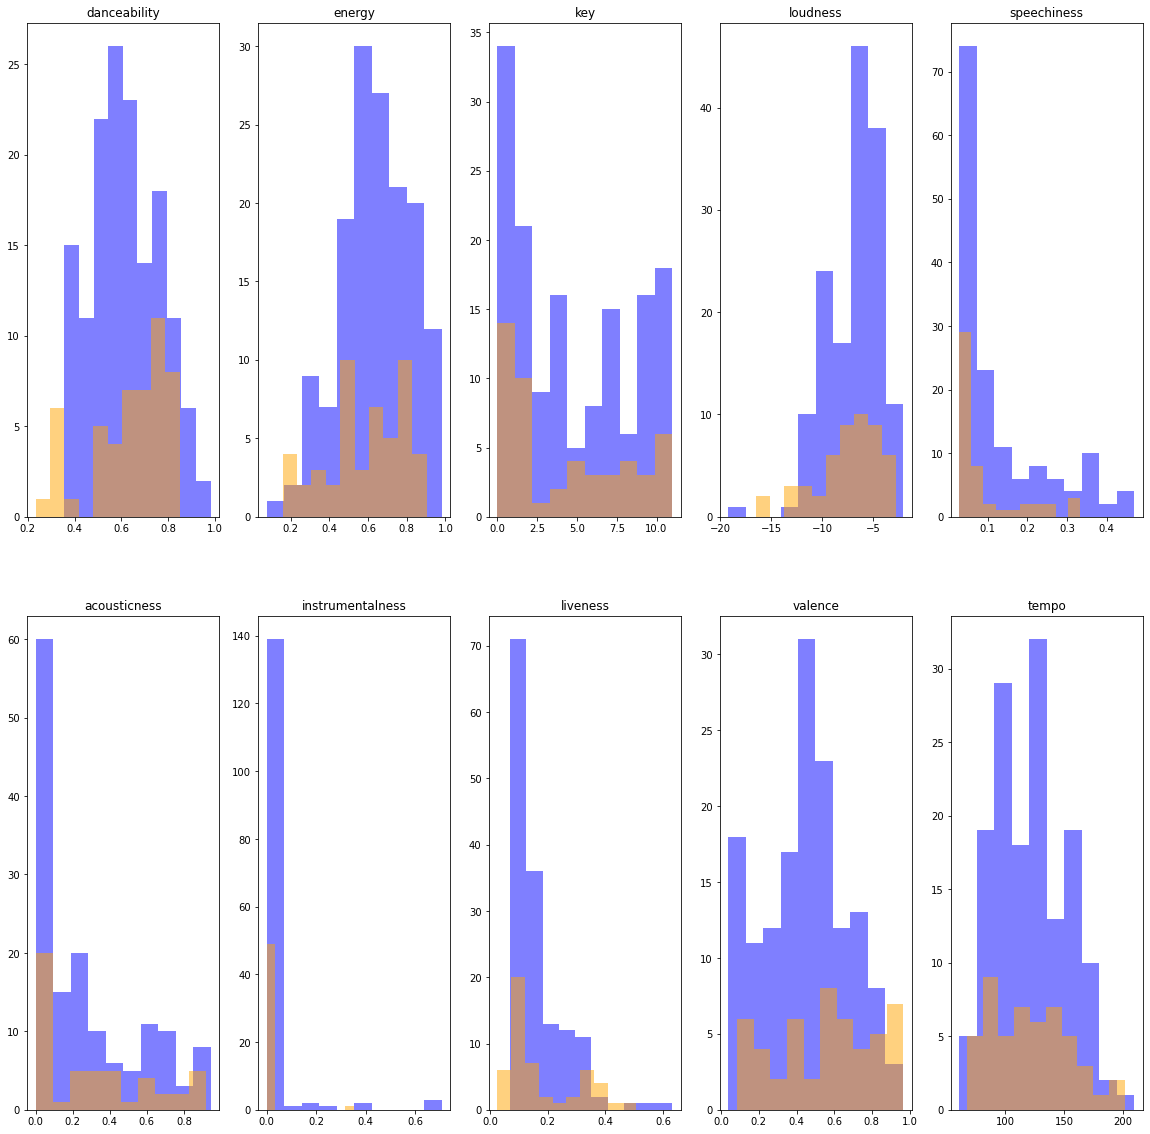

In [69]:
fig1, ax1 = plt.subplots(2, 5, figsize = (20, 20))
ax1[0, 0].title.set_text("danceability")
ax1[0, 0].hist(trackNamesWithData['danceability'], color = "blue", alpha = .5)
ax1[0, 0].hist(finalDf['danceability'], color = "orange", alpha = .5)

ax1[0, 1].title.set_text("energy")
ax1[0, 1].hist(trackNamesWithData['energy'], color = "blue", alpha = .5)
ax1[0, 1].hist(finalDf['energy'], color = "orange", alpha = .5)

ax1[0, 2].title.set_text("key")
ax1[0, 2].hist(trackNamesWithData['key'], color = "blue", alpha = .5)
ax1[0, 2].hist(finalDf['key'], color = "orange", alpha = .5)

ax1[0, 3].title.set_text("loudness")
ax1[0, 3].hist(trackNamesWithData['loudness'], color = "blue", alpha = .5)
ax1[0, 3].hist(finalDf['loudness'], color = "orange", alpha = .5)

ax1[0, 4].title.set_text("speechiness")
ax1[0, 4].hist(trackNamesWithData['speechiness'], color = "blue", alpha = .5)
ax1[0, 4].hist(finalDf['speechiness'], color = "orange", alpha = .5)

ax1[1, 0].title.set_text("acousticness")
ax1[1, 0].hist(trackNamesWithData['acousticness'], color = "blue", alpha = .5)
ax1[1, 0].hist(finalDf['acousticness'], color = "orange", alpha = .5)

ax1[1, 1].title.set_text("instrumentalness")
ax1[1, 1].hist(trackNamesWithData['instrumentalness'], color = "blue", alpha = .5)
ax1[1, 1].hist(finalDf['instrumentalness'], color = "orange", alpha = .5)

ax1[1, 2].title.set_text("liveness")
ax1[1, 2].hist(trackNamesWithData['liveness'], color = "blue", alpha = .5)
ax1[1, 2].hist(finalDf['liveness'], color = "orange", alpha = .5)

ax1[1, 3].title.set_text("valence")
ax1[1, 3].hist(trackNamesWithData['valence'], color = "blue", alpha = .5)
ax1[1, 3].hist(finalDf['valence'], color = "orange", alpha = .5)

ax1[1, 4].title.set_text("tempo")
ax1[1, 4].hist(trackNamesWithData['tempo'], color = "blue", alpha = .5)
ax1[1, 4].hist(finalDf['tempo'], color = "orange", alpha = .5)



plt.show()

In the graphs above, the purple color is values from the New Music Friday playlist, while the orange color is values from the Top Songs USA playlist. There appear to be some trends, but I will need more statistical analysis to come up with a way to figure out if the values with more songs mean anything significant or not.

I realize this analysis plan is not complete in the slightest. I did not have any time over the weekend to work on this because of KHE and I had another group project due tonight that took longer to debug than my groupmates and I previously thought. I will do my best to continue to develop this analysis for the Preliminary Draft assignment due this Thursday.